In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from cryptory import Cryptory
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%y')
data=pd.read_csv("/Users/Andy/Desktop/Bitcoin/Data/Bitcoin_real.csv")


## Autocorrelation Plots And Check Stationarity
Only data from 2018 has stationarity

Results are： (0.77991316449820969, 0.99130491162232082, 3, 177, {'10%': -2.575551186759871, '5%': -2.8780117454974392, '1%': -3.4678453197999071}, 2363.8986159484743)
Results are： (-3.7120644420576099, 0.0039466219129777663, 6, 539, {'10%': -2.5696338432333636, '5%': -2.8669171671779816, '1%': -3.4425405682241816}, 7517.7132274662554)
Results are： (-2.0060052921355331, 0.28394621147854754, 20, 890, {'10%': -2.5685020855952532, '5%': -2.8647929301713977, '1%': -3.4377188325344799}, 13036.380167582043)
Results are： (-1.5862617332629454, 0.49049094110489838, 20, 1256, {'10%': -2.5679966213893057, '5%': -2.8638438984080117, '1%': -3.4355671297788666}, 17931.222349732685)
Results are： (-1.43506169552768, 0.56535652224399202, 20, 1621, {'10%': -2.5677201128198259, '5%': -2.8633246558950796, '1%': -3.4343905216323187}, 22704.055682613562)
Results are： (-1.3638464903723211, 0.59948067054308918, 20, 1986, {'10%': -2.5675453345421984, '5%': -2.8629964159491892, '1%': -3.4336469649065298}, 27409.

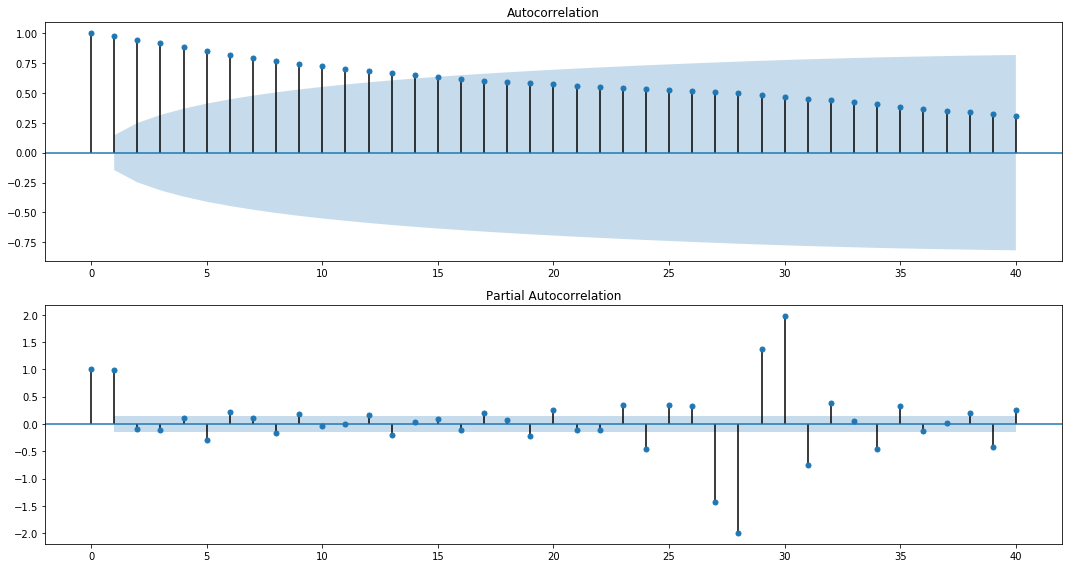

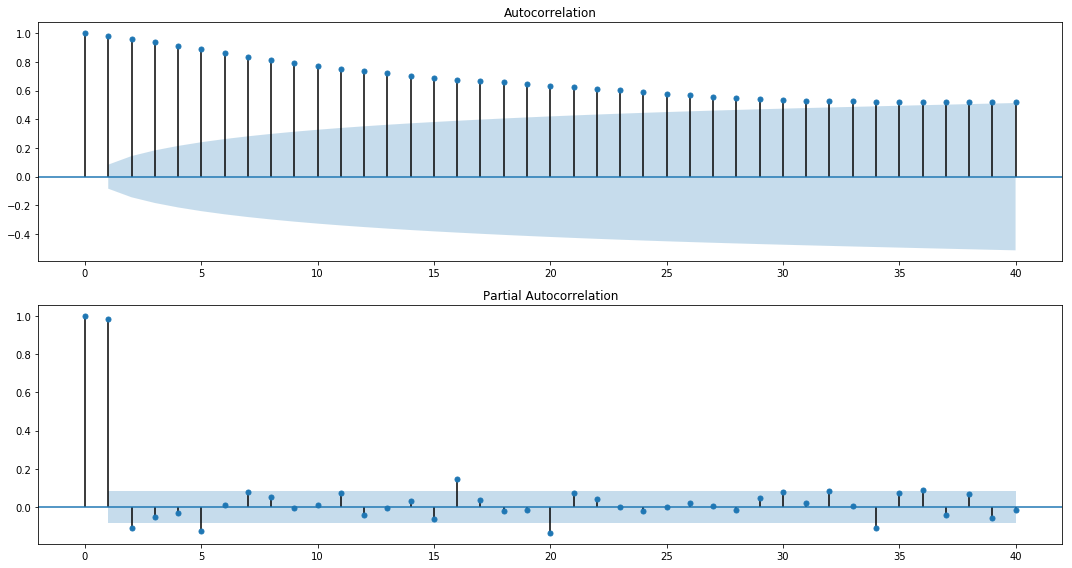

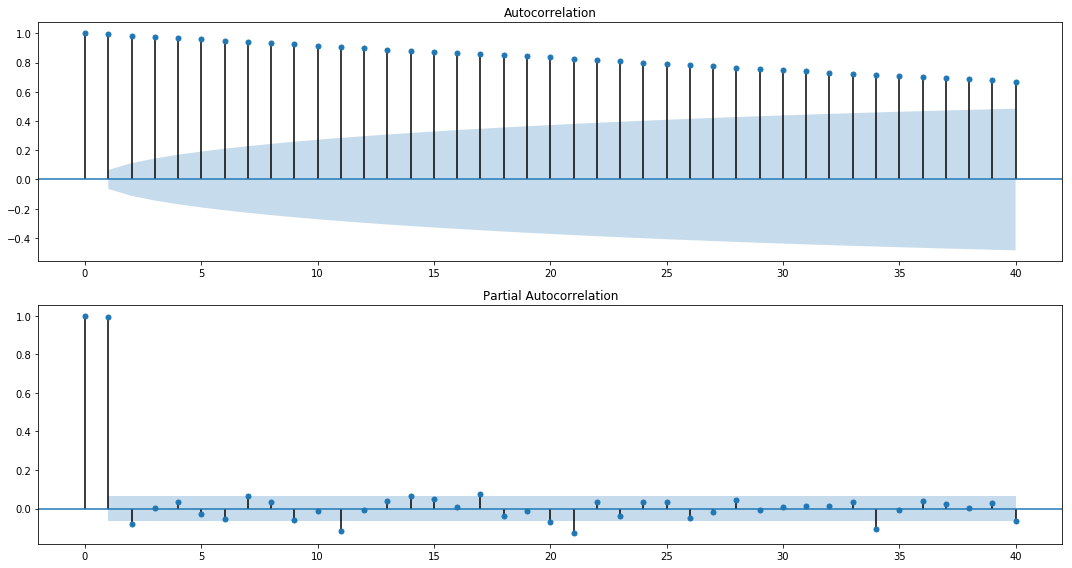

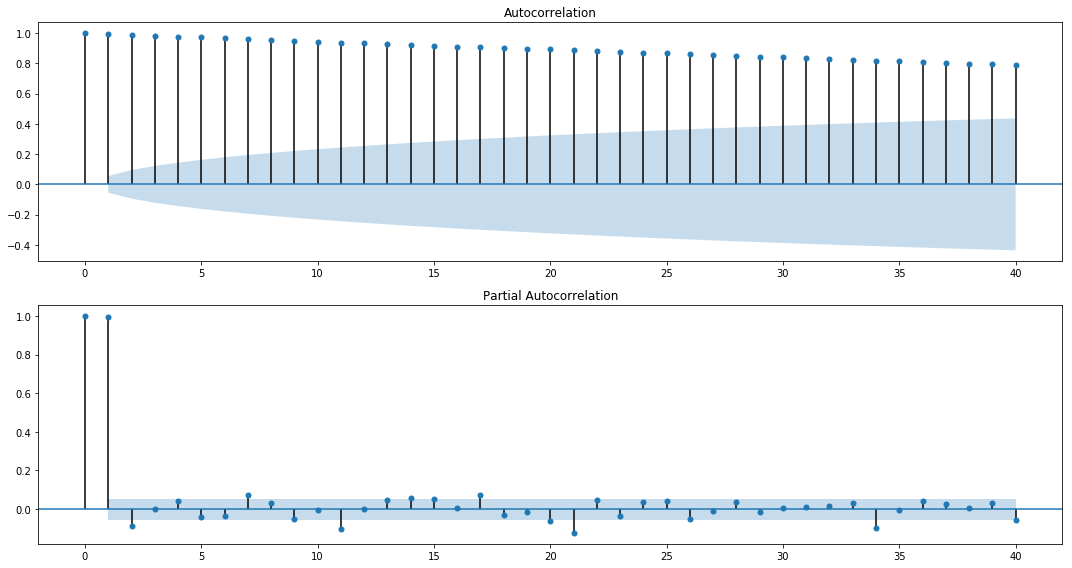

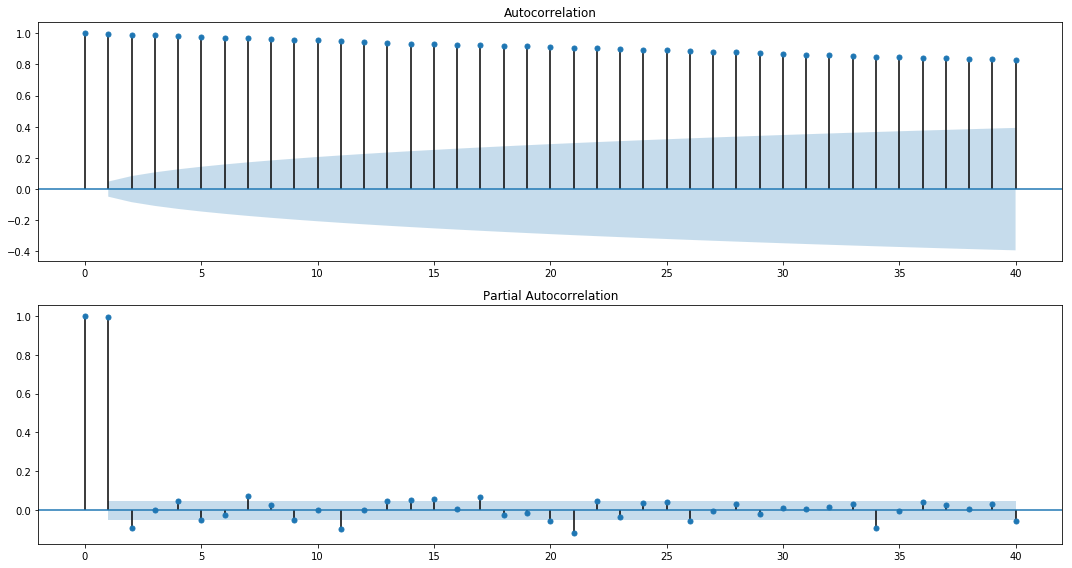

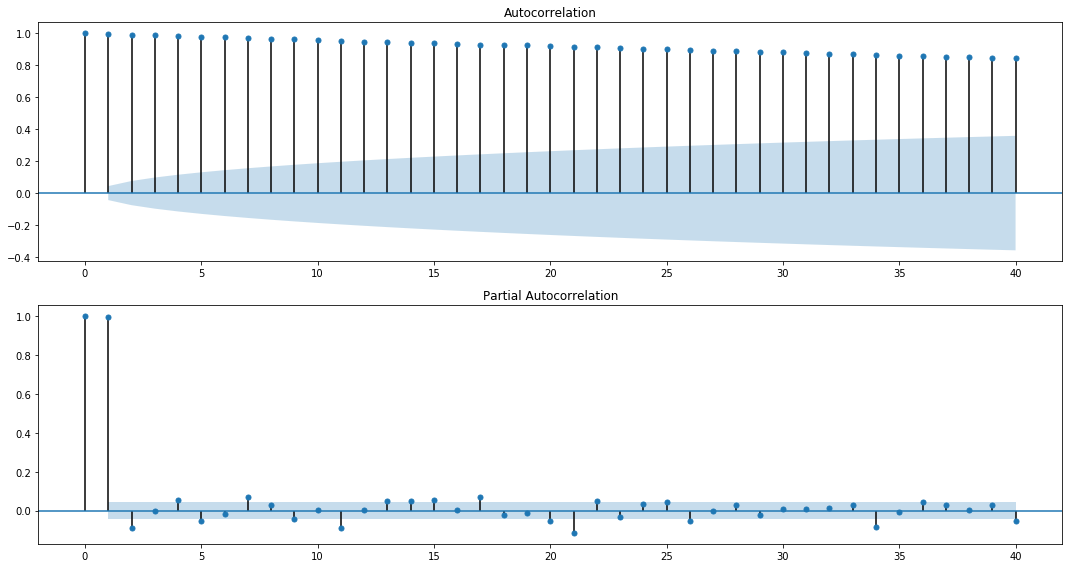

In [85]:
# Data period
periods = [2019,2018,2017,2016,2015,2014]

def plot_autocorrelation(year,month='01'):
    # Plot the Autocorrelation and Partial-Autocorrelation of the bitcoin prices
    df_train_startdate = str(year) + '-' + month + '-01'
    df_train_raw = pd.read_csv('/Users/Andy/Desktop/Bitcoin/Data/Bitcoin_real.csv', parse_dates=['date'], index_col='date', date_parser=dateparse)
    df_train = df_train_raw[df_train_startdate:].loc[:, ['close']]

    fig = plt.figure(figsize=(15, 8))
    ax1 = fig.add_subplot(2, 1, 1)
    fig = sm.graphics.tsa.plot_acf(df_train, lags=40, ax=ax1)
    ax1.xaxis.set_ticks_position('bottom')
    fig.tight_layout()

    ax2 = fig.add_subplot(2, 1, 2)
    fig = sm.graphics.tsa.plot_pacf(df_train, lags=40, ax=ax2)
    ax2.xaxis.set_ticks_position('bottom')
    fig.tight_layout()

def check_stationarity(year,month='01'):
    df_train_startdate = str(year) + '-' + month + '-01'
    df_train_raw = pd.read_csv('/Users/Andy/Desktop/Bitcoin/Data/Bitcoin_real.csv', parse_dates=['date'], index_col='date', date_parser=dateparse)
    df_train = df_train_raw[df_train_startdate:].loc[:, ['close']]
    
    print('Results are：',adfuller(df_train['close']))

for i in range(0,len(periods)):
    plot_autocorrelation(periods[i])
    check_stationarity(periods[i])
        

### Check stationarity of data from each month of 2018

Results are： (-3.7120644420576099, 0.0039466219129777663, 6, 539, {'10%': -2.5696338432333636, '5%': -2.8669171671779816, '1%': -3.4425405682241816}, 7517.7132274662554)
Results are： (-1.298601759133938, 0.62981176753939694, 3, 511, {'10%': -2.5697913249796072, '5%': -2.8672126791646955, '1%': -3.4432119442564324}, 6960.2631256708728)
Results are： (-2.0090111907261421, 0.28263603701460815, 3, 483, {'10%': -2.5699671340268937, '5%': -2.8675425624806605, '1%': -3.4439615820186846}, 6518.0167141067996)
Results are： (-0.50820037546106112, 0.89040628947037215, 3, 452, {'10%': -2.5701872889419688, '5%': -2.8679556266351653, '1%': -3.4449004999252368}, 6068.5339189410479)
Results are： (-1.1103476307885982, 0.71092779788688065, 3, 422, {'10%': -2.570431271085555, '5%': -2.868413360220551, '1%': -3.4459412874253599}, 5630.0088323594609)


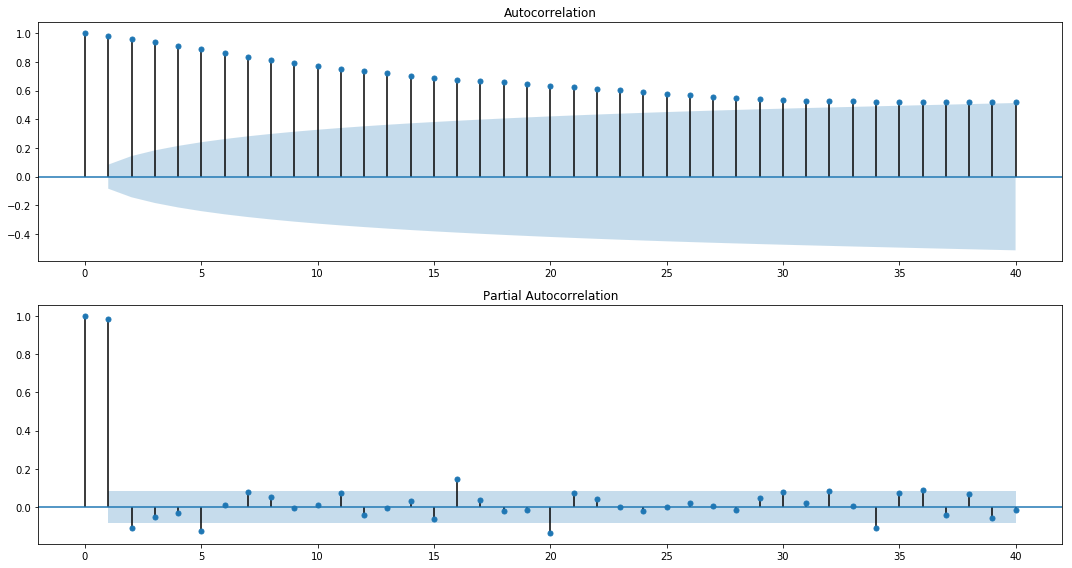

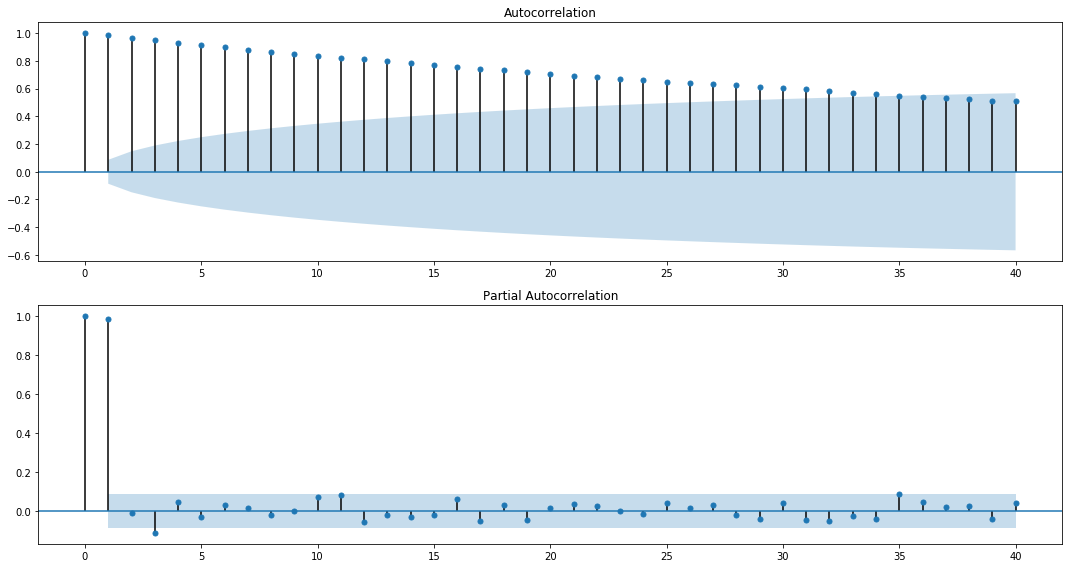

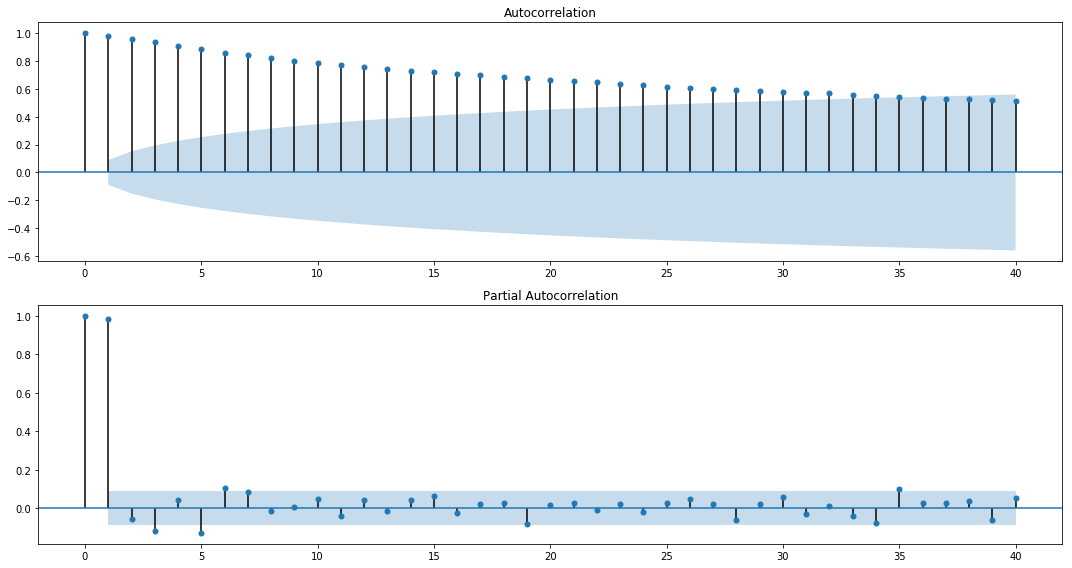

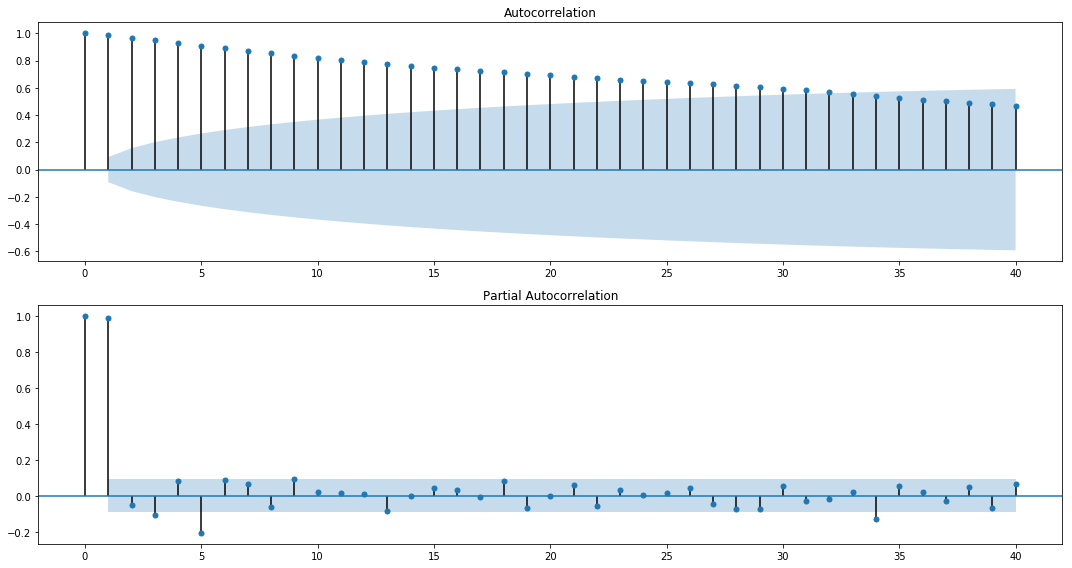

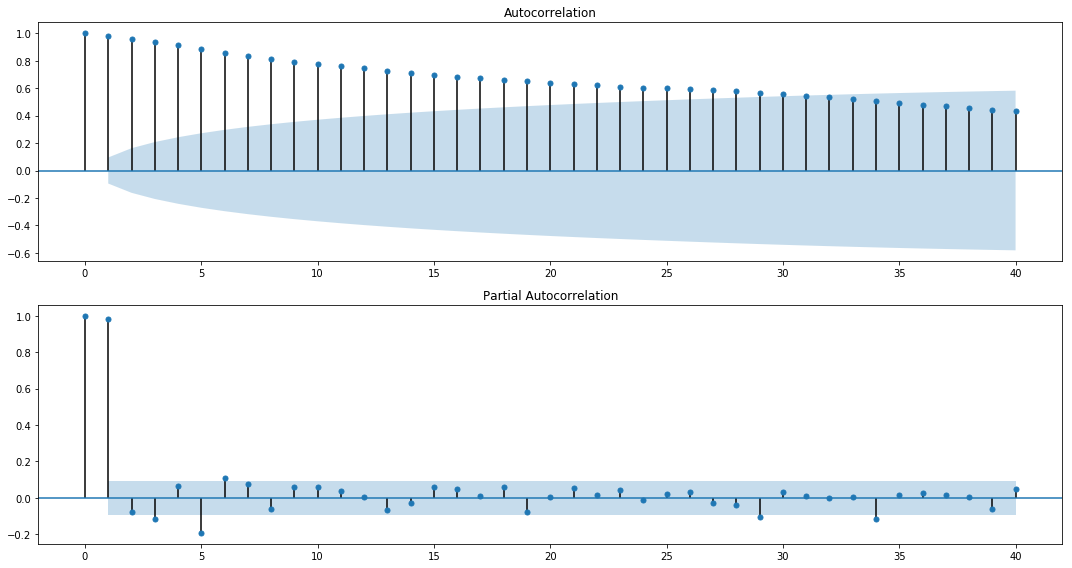

In [87]:
periods = ['01','02','03','04','05']
for i in range(0,len(periods)):
    plot_autocorrelation(2018,periods[i])
    check_stationarity(2018,periods[i])

        

In [118]:
# We decide to use only data from January 2018 to train model
data = data.iloc[1461:]

## Correlation matrix

In [119]:
data.corr(method='pearson')

,open,high,low,close,volume,marketcap,BCHAIN-DIFF,BCHAIN-AVBLS,BCHAIN-MIREV,BCHAIN-CPTRA,BCHAIN-NTRAN,BCHAIN-HRATE,BCHAIN-CPT,BCHAIN-NTRBL
open,1.000000,0.996338,0.992744,0.990416,0.327547,0.988347,-0.564314,-0.043110,0.956724,0.862564,-0.177398,-0.474018,0.861138,-0.304444
high,0.996338,1.000000,0.992740,0.995877,0.350713,0.994210,-0.568660,-0.031318,0.956131,0.858795,-0.168196,-0.478114,0.857166,-0.296719
low,0.992744,0.992740,1.000000,0.995848,0.317455,0.994792,-0.543284,-0.053742,0.945848,0.857850,-0.182357,-0.449918,0.857064,-0.311150
close,0.990416,0.995877,0.995848,1.000000,0.341380,0.998815,-0.556485,-0.040399,0.949397,0.854796,-0.170226,-0.463429,0.853541,-0.300334
volume,0.327547,0.350713,0.317455,0.341380,1.000000,0.375356,0.140233,0.571305,0.362076,-0.033792,0.662021,0.190106,-0.034741,0.569946
marketcap,0.988347,0.994210,0.994792,0.998815,0.375356,1.000000,-0.522451,-0.018080,0.945961,0.836355,-0.141462,-0.428227,0.835491,-0.272789
BCHAIN-DIFF,-0.564314,-0.568660,-0.543284,-0.556485,0.140233,-0.522451,1.000000,0.287941,-0.574522,-0.751867,0.442618,0.927303,-0.742765,0.536268
BCHAIN-AVBLS,-0.043110,-0.031318,-0.053742,-0.040399,0.571305,-0.018080,0.287941,1.000000,-0.021187,-0.397596,0.734358,0.170081,-0.405429,0.804247
BCHAIN-MIREV,0.956724,0.956131,0.945848,0.949397,0.362076,0.945961,-0.574522,-0.021187,1.000000,0.819076,-0.044480,-0.434589,0.816308,-0.236714
BCHAIN-CPTRA,0.862564,0.858795,0.857850,0.854796,-0.033792,0.836355,-0.751867,-0.397596,0.819076,1.000000,-0.559922,-0.630500,0.999816,-0.689405


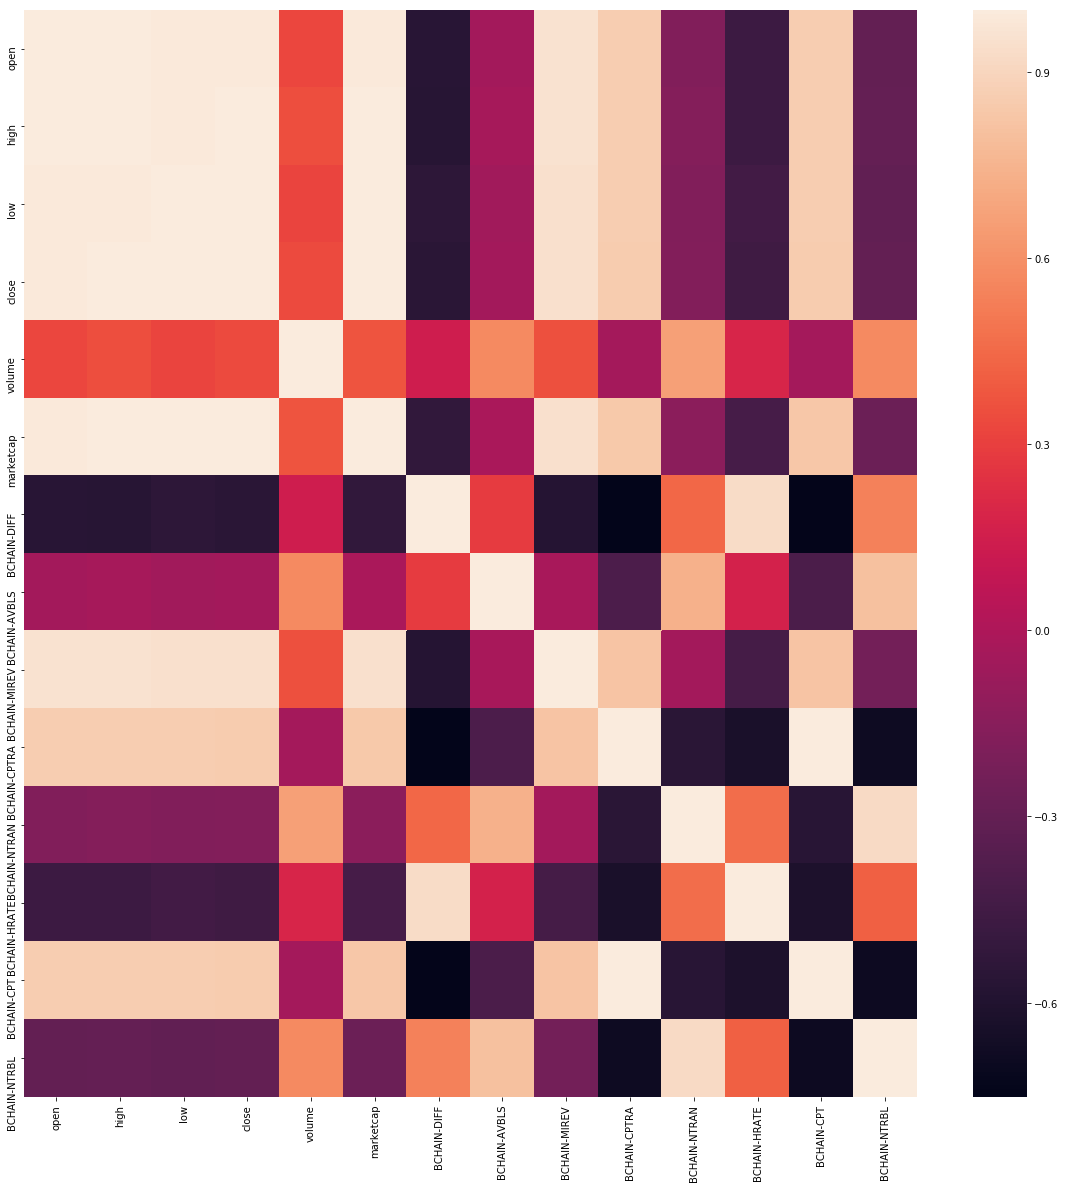

In [120]:
corr = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(corr, 
            xticklabels=[col.replace("_price", "") for col in corr.columns.values],
            yticklabels=[col.replace("_price", "") for col in corr.columns.values],
            annot_kws={"size": 16})
plt.show()

### Check multicollinearity

In [125]:
data_pearson = data.corr(method='pearson')[(corr >= 0.8) | (corr <= -0.8)]

In [126]:
data_pearson

,open,high,low,close,volume,marketcap,BCHAIN-DIFF,BCHAIN-AVBLS,BCHAIN-MIREV,BCHAIN-CPTRA,BCHAIN-NTRAN,BCHAIN-HRATE,BCHAIN-CPT,BCHAIN-NTRBL
open,1.000000,0.996338,0.992744,0.990416,NaN,0.988347,NaN,NaN,0.956724,0.862564,NaN,NaN,0.861138,NaN
high,0.996338,1.000000,0.992740,0.995877,NaN,0.994210,NaN,NaN,0.956131,0.858795,NaN,NaN,0.857166,NaN
low,0.992744,0.992740,1.000000,0.995848,NaN,0.994792,NaN,NaN,0.945848,0.857850,NaN,NaN,0.857064,NaN
close,0.990416,0.995877,0.995848,1.000000,NaN,0.998815,NaN,NaN,0.949397,0.854796,NaN,NaN,0.853541,NaN
volume,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marketcap,0.988347,0.994210,0.994792,0.998815,NaN,1.000000,NaN,NaN,0.945961,0.836355,NaN,NaN,0.835491,NaN
BCHAIN-DIFF,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.927303,NaN,NaN
BCHAIN-AVBLS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.804247
BCHAIN-MIREV,0.956724,0.956131,0.945848,0.949397,NaN,0.945961,NaN,NaN,1.000000,0.819076,NaN,NaN,0.816308,NaN
BCHAIN-CPTRA,0.862564,0.858795,0.857850,0.854796,NaN,0.836355,NaN,NaN,0.819076,1.000000,NaN,NaN,0.999816,NaN


In [127]:
# Remove multicollinear variables that have very high correlation with close price 
data = data.drop(columns=['open','high','low','marketcap'])
data.head()

,date,close,volume,BCHAIN-DIFF,BCHAIN-AVBLS,BCHAIN-MIREV,BCHAIN-CPTRA,BCHAIN-NTRAN,BCHAIN-HRATE,BCHAIN-CPT,BCHAIN-NTRBL
1461,1/1/18,13657.2,10291200000,1.870000e+12,1.037057,35435185.86,125.970638,290422,15177350.25,122.012747,1781.730061
1462,2/1/18,14982.1,16846600192,1.920000e+12,1.043383,32334328.99,138.227164,241757,14975580.96,133.747230,1549.724359
1463,3/1/18,15201.0,16871900160,1.930000e+12,1.041368,40553327.64,122.635624,340980,16415540.67,118.931690,1994.035088
1464,4/1/18,15599.2,21783199744,1.930000e+12,1.065513,39612658.08,103.108719,395963,15071578.27,100.041312,2522.057325
1465,5/1/18,17429.5,23840899072,1.930000e+12,1.065833,42527795.29,102.933856,425008,16127548.73,100.063517,2529.809524


### Historgram of each feature

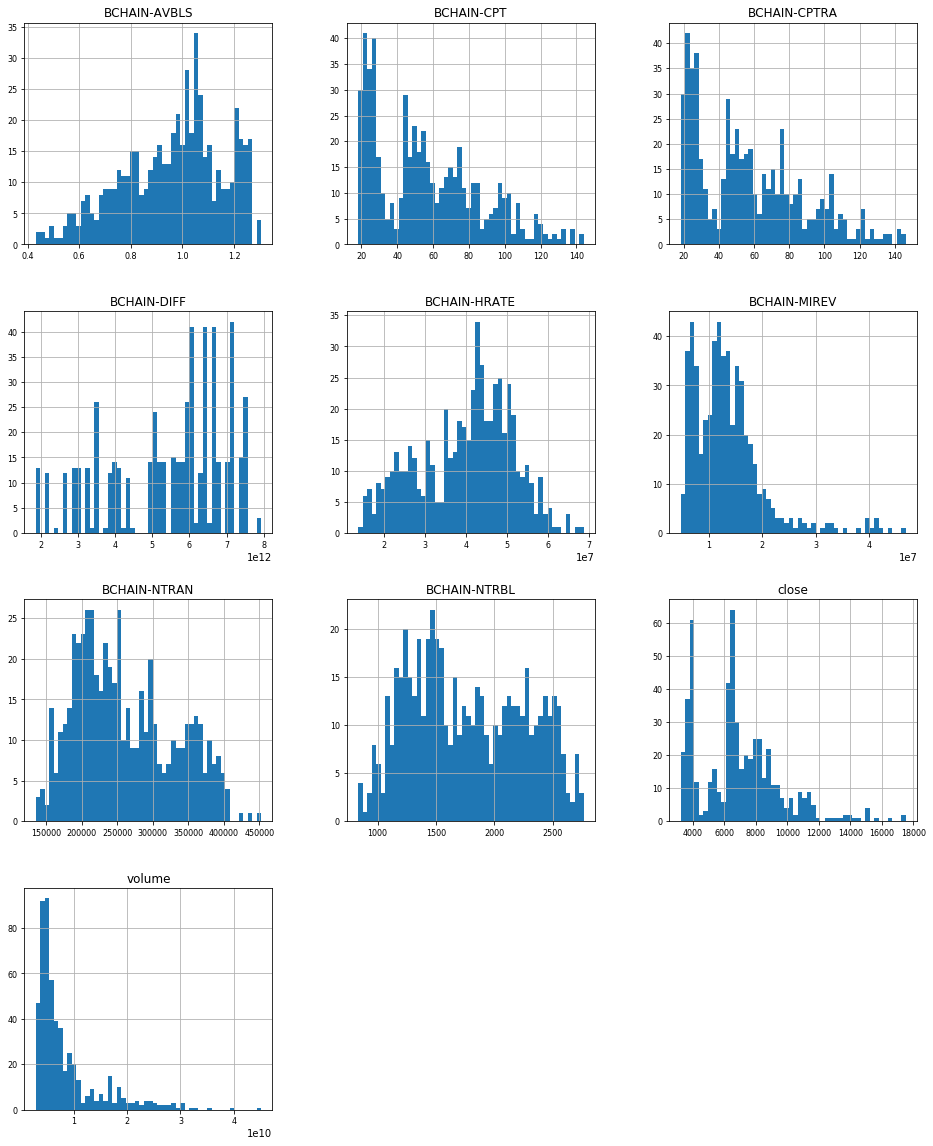

In [128]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

### Scatter Plots between price and features

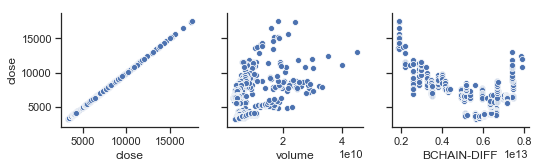

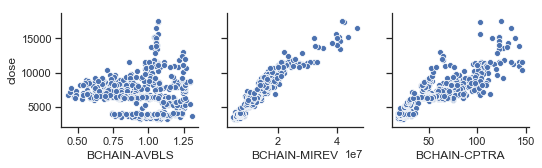

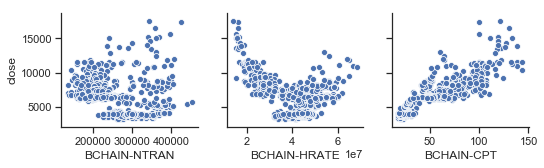

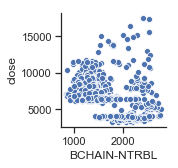

In [129]:

%matplotlib inline
sns.set_context('notebook')
sns.set(style="ticks", color_codes=True)

for i in range(0, len(data.iloc[:,1:].columns), 3):
    sns.pairplot(data=data.iloc[:,1:],
                x_vars=data.iloc[:,1:].columns[i:i+3],
                y_vars=['close'])

In [132]:
data.to_csv('Data_after_EDA.csv')